# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

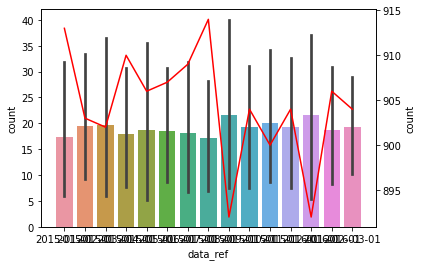

In [2]:
counts = df.groupby(['data_ref', 'tipo_residencia']).size().reset_index(name='count')
df_casa = counts[counts['tipo_residencia'] == 'Casa']
df_outros = counts[counts['tipo_residencia'] != 'Casa']
sns.barplot(data=df_outros, x='data_ref', y='count')
plt.twinx()
sns.lineplot(data=df_casa, x='data_ref', y='count', color='red')
plt.show()

In [67]:
def plot_distvar(df, variable, y2=None):
    if y2:
        f, axs = plt.subplots(figsize= (10,4))
        
        sns.countplot(ax=axs, data= df[df[variable] != y2], x='data_ref', hue= variable)
        
        ax2 = axs.twinx()
        ax2.bar(df['data_ref'], df[df[variable] == y2])
        
        plt.title(variable)
        plt.xticks(rotation=30)
        plt.legend(bbox_to_anchor=(1.05,1))
        
        plt.show()
                                       
    else:
        f, axs = plt.subplots(1, figsize= (10,4))
                                  
        sns.countplot(ax=axs, data= df, x='data_ref', hue= variable)  
        
        plt.title(variable)
        plt.ylabel('Count')
        plt.xticks(rotation=30)
        plt.legend(bbox_to_anchor=(1.05,1))
        

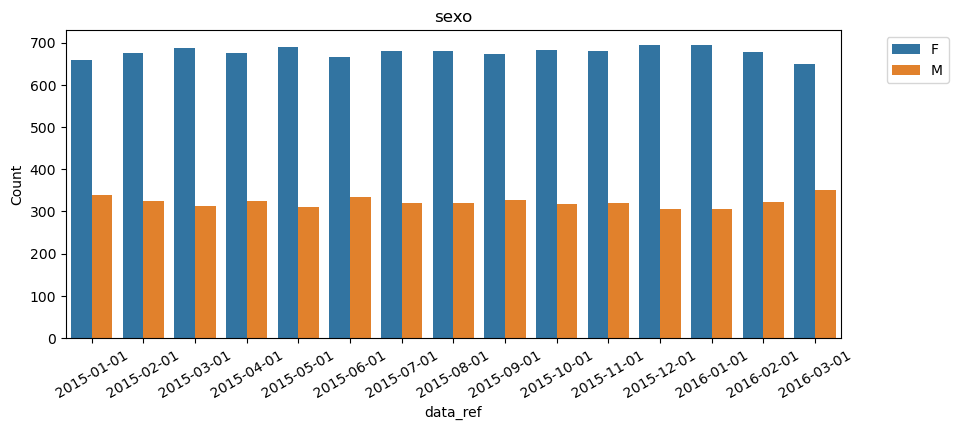

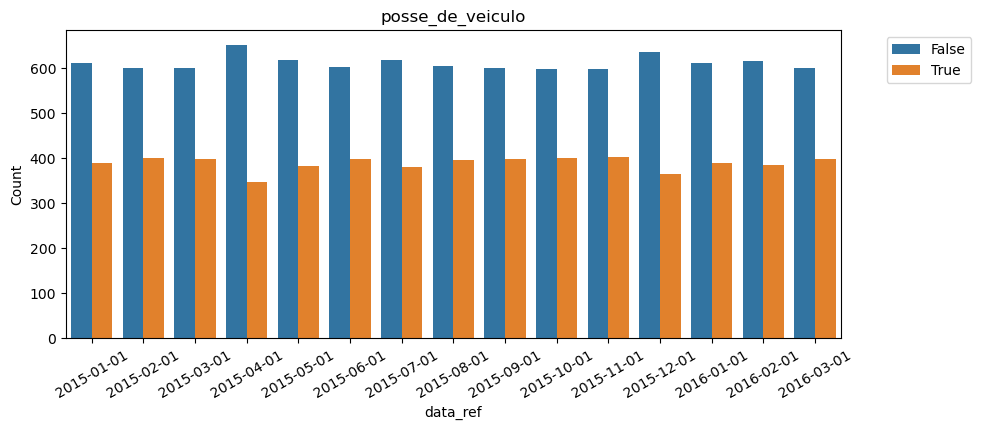

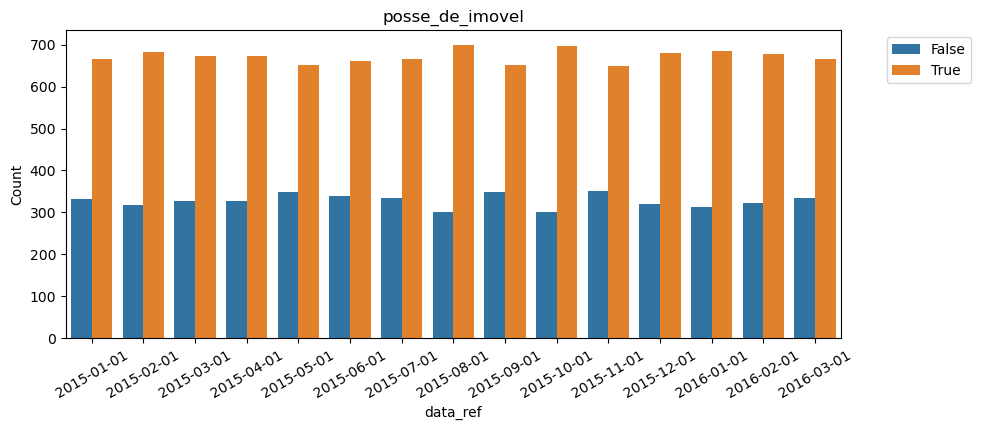

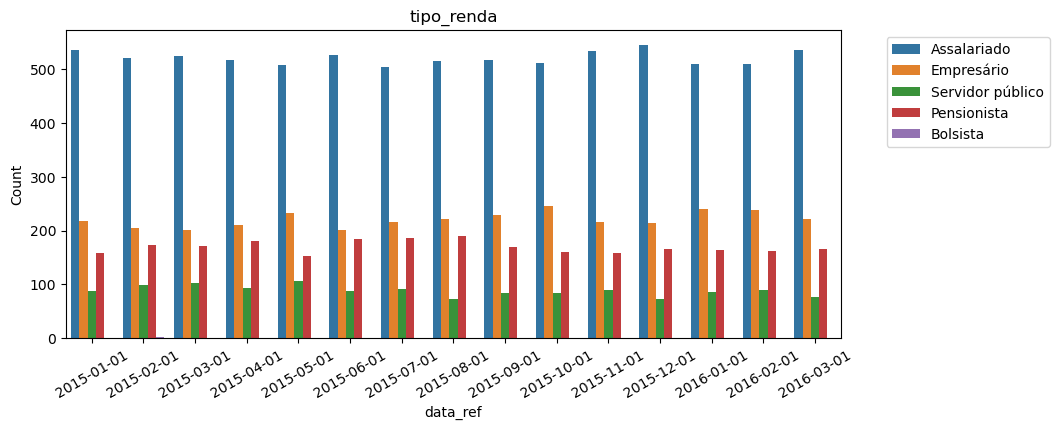

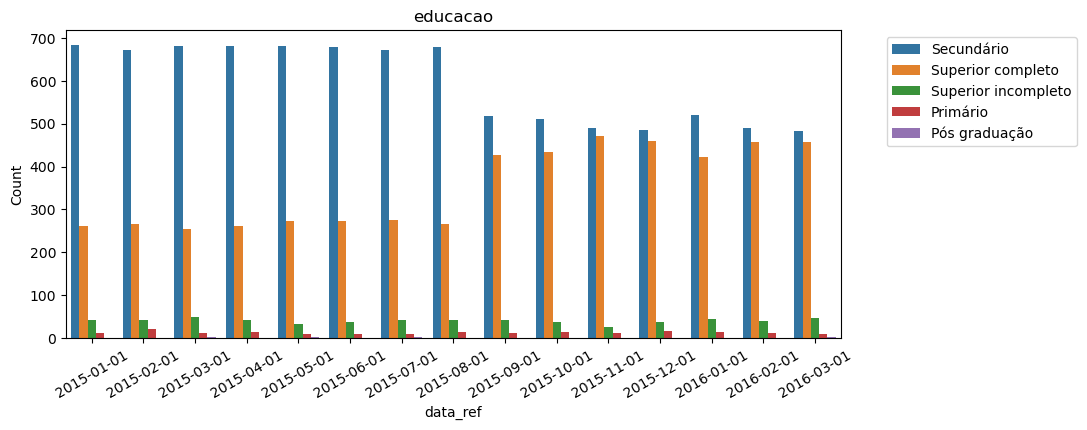

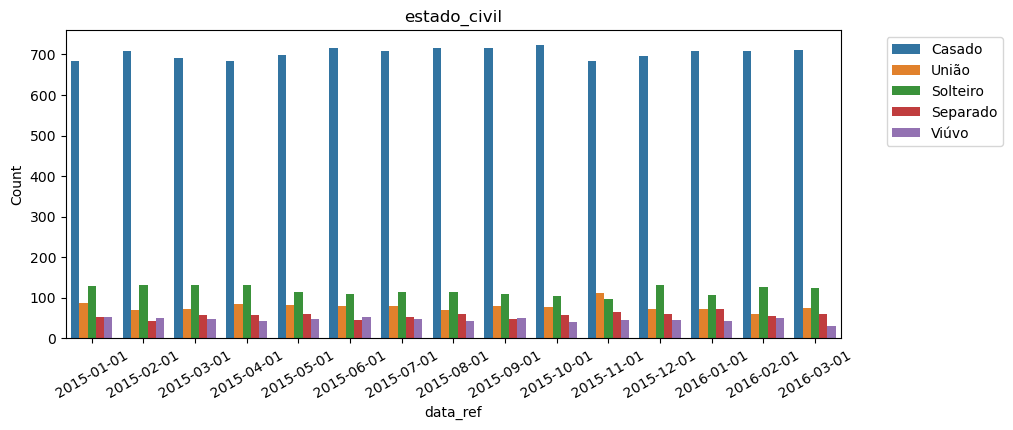

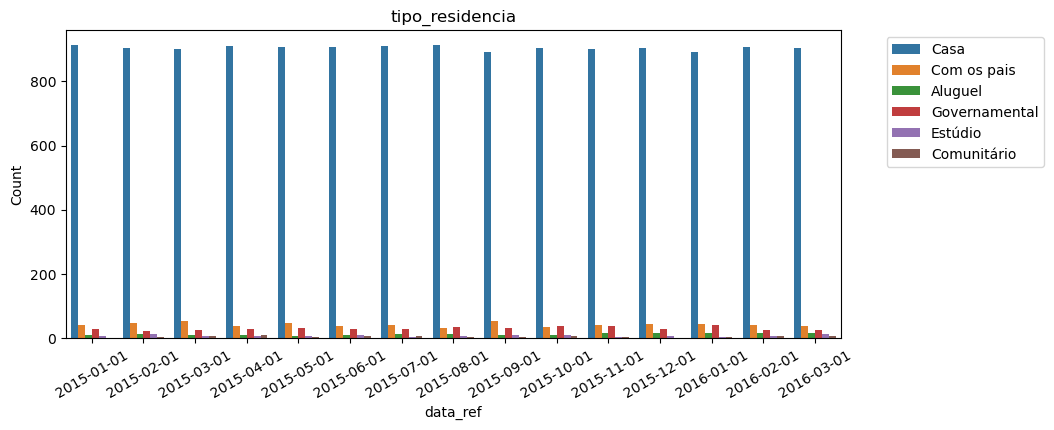

In [87]:
plot_distvar(df,'sexo')
plot_distvar(df,'posse_de_veiculo')
plot_distvar(df,'posse_de_imovel')
plot_distvar(df,'tipo_renda')
plot_distvar(df,'educacao')
plot_distvar(df,'estado_civil')
plot_distvar(df,'tipo_residencia')

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [49]:
def plot_categorical_variable(df, variable):
    # cria dummies e agrupa pela data_ref
    dummies = pd.get_dummies(df[variable])
    dummies = dummies.join(df['data_ref'], how='left')
    dummies = dummies.groupby('data_ref').mean()
            
    
    # plota gráfico de linhas
    dummies.plot(kind='line', figsize=(8,4))
    plt.xticks(rotation=30)    
    plt.title(variable)
    plt.ylabel('Média')
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.show()

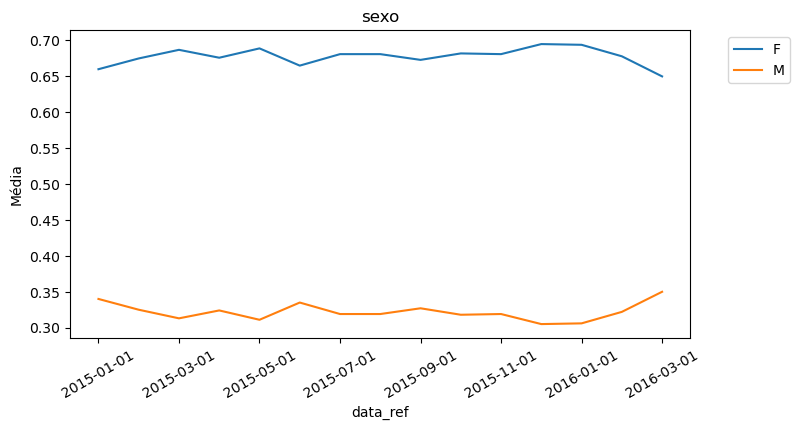

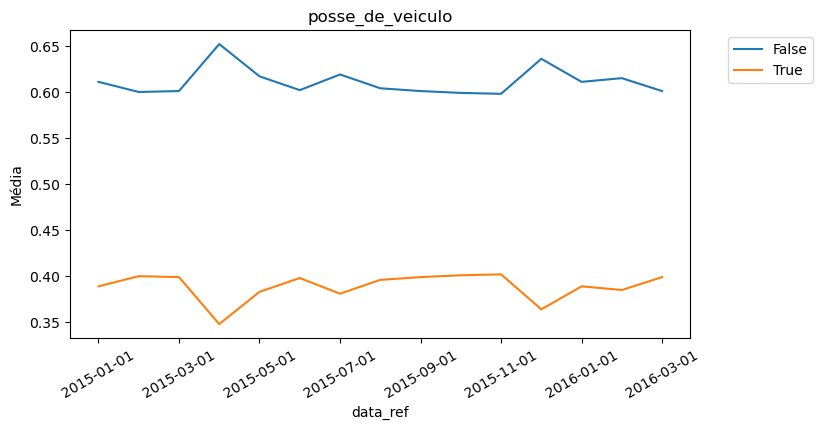

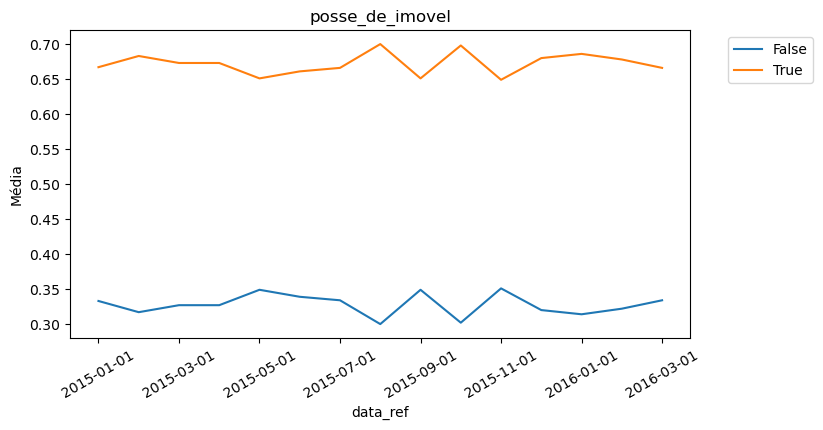

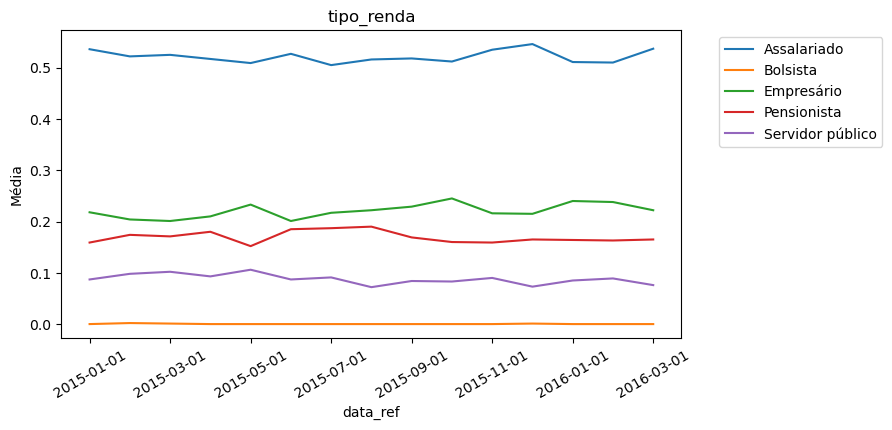

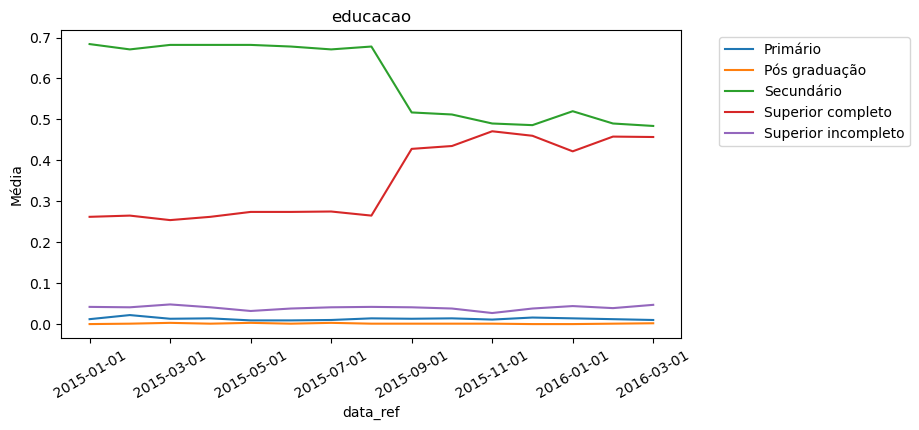

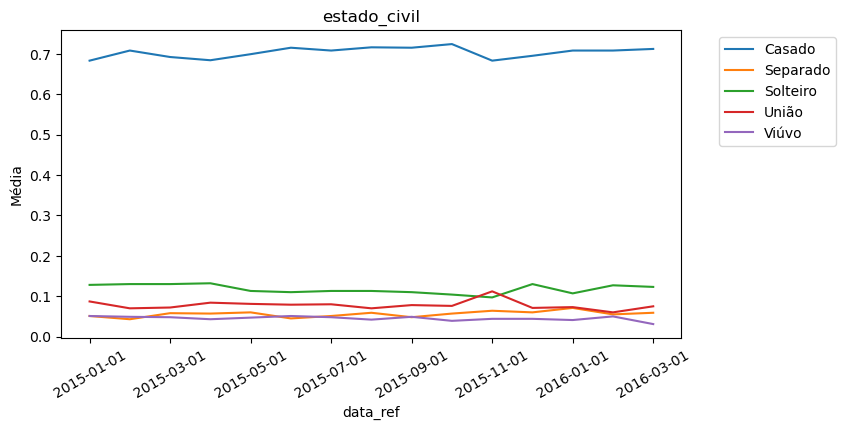

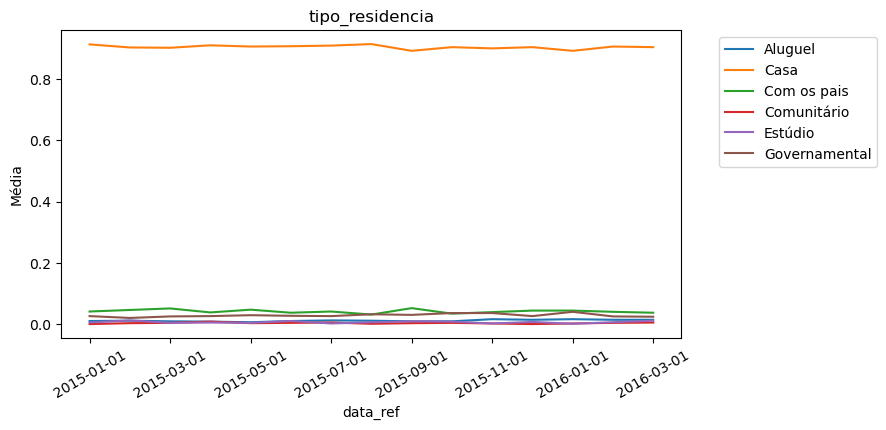

In [51]:
plot_categorical_variable(df, 'sexo')
plot_categorical_variable(df, 'posse_de_veiculo')
plot_categorical_variable(df, 'posse_de_imovel')
plot_categorical_variable(df, 'tipo_renda')
plot_categorical_variable(df, 'educacao')
plot_categorical_variable(df, 'estado_civil')
plot_categorical_variable(df, 'tipo_residencia')

In [ ]:
As variáveis parecem manter uma média estável. Destaque para a variável educacao que apresenta
um comportamento distinto durante a segunda metade do ano para os valores superior completo e secundário.